In [1]:
import warnings
import pandas as pd; warnings.simplefilter(action='ignore',category=FutureWarning)

# Reading in the datasets
channel_transactions = pd.read_csv("C:\\Labs\\Resources\\team-project\\transactions.csv")
channel_touchpoints = pd.read_csv("C:\\Labs\\Resources\\team-project\\customer_touchpoints.csv")
channel_customers = pd.read_csv("C:\\Labs\\Resources\\team-project\\customers.csv")
channel_marketing_spend = pd.read_csv("C:\\Labs\\Resources\\team-project\\marketing_spend.csv")
channel_marketing_campaigns = pd.read_csv("C:\\Labs\\Resources\\team-project\\marketing_campaigns.csv")
channel_stores = pd.read_csv("C:\\Labs\\Resources\\team-project\\stores.csv")



# Data Cleaning

## Transactions

In [2]:
channel_transactions.loc[channel_transactions.duplicated()]
## channel_transactions.drop_duplicates(keep = 'first', inplace = True) 



,transaction_id,customer_id,order_date,channel,store_id,payment_method,card_bank,subtotal,discount_amount,tax_amount,shipping_amount,total_amount,promo_code_used,device_type,fulfillment_method,return_flag


In [3]:
channel_transactions.isnull().sum()


transaction_id         0
customer_id            0
order_date             0
channel                0
store_id              29
payment_method         0
card_bank             41
subtotal               0
discount_amount        0
tax_amount             0
shipping_amount        3
total_amount           0
promo_code_used       26
device_type           16
fulfillment_method     0
return_flag            0
dtype: int64

In [4]:
cln_df_trans = channel_transactions.copy() #creates a copy
cln_df_trans['device_type'].fillna('Store', inplace=True)
cln_df_trans['promo_code_used'].fillna('None', inplace=True)
cln_df_trans.fillna({'shipping_amount':cln_df_trans.shipping_amount.mode()[0]},inplace=True)
cln_df_trans.drop(columns=["card_bank"], inplace=True)
cln_df_trans['store_id'].fillna('NA', inplace=True) #check if you can do string 
cln_df_trans.isnull().sum()


transaction_id        0
customer_id           0
order_date            0
channel               0
store_id              0
payment_method        0
subtotal              0
discount_amount       0
tax_amount            0
shipping_amount       0
total_amount          0
promo_code_used       0
device_type           0
fulfillment_method    0
return_flag           0
dtype: int64

In [5]:
cln_df_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   transaction_id      45 non-null     int64  
 1   customer_id         45 non-null     int64  
 2   order_date          45 non-null     object 
 3   channel             45 non-null     object 
 4   store_id            45 non-null     object 
 5   payment_method      45 non-null     object 
 6   subtotal            45 non-null     float64
 7   discount_amount     45 non-null     float64
 8   tax_amount          45 non-null     float64
 9   shipping_amount     45 non-null     float64
 10  total_amount        45 non-null     float64
 11  promo_code_used     45 non-null     object 
 12  device_type         45 non-null     object 
 13  fulfillment_method  45 non-null     object 
 14  return_flag         45 non-null     bool   
dtypes: bool(1), float64(5), int64(2), object(7)
memory usage: 5

In [6]:
cln_df_trans = cln_df_trans.astype({
    'transaction_id': 'string',
    'customer_id': 'string',
    'store_id': 'string',
    'promo_code_used': 'string',
    'channel': 'category',
    'payment_method': 'category',
    'device_type': 'category',
    'fulfillment_method': 'category'
})

cln_df_trans['order_date'] = pd.to_datetime(cln_df_trans['order_date'], format='%m/%d/%y %H:%M')


In [7]:
# Analyse categorical columns uniqueness
trans_cat_cols = ['channel', 'payment_method', 'device_type', 'fulfillment_method']

for col in trans_cat_cols:
    print(f"\n{col.upper()}:")
    # print(f"  Unique values: {cln_df_trans[col].nunique()}")
    print(f"  Unique list: {cln_df_trans[col].unique().tolist()}")
    # print(f"\n  Value counts:")
    # print(cln_df_trans[col].value_counts())


CHANNEL:
  Unique list: ['Online', 'Store', 'Mobile App']

PAYMENT_METHOD:
  Unique list: ['Credit Card', 'Credit Cards', 'PayPal', 'Apple Pay', 'credit card', 'Cash', 'Debit Card', 'Google Pay', 'CC']

DEVICE_TYPE:
  Unique list: ['Mobile', 'Store', 'Desktop']

FULFILLMENT_METHOD:
  Unique list: ['Ship', 'In-Store', 'BOPIS']


In [8]:
# Convert to lowercase and strip whitespace
cln_df_trans['payment_method'] = cln_df_trans['payment_method'].str.lower().str.strip()

# Map variations to standardized labels
cln_df_trans['payment_method'] = cln_df_trans['payment_method'].replace({
    'credit card': 'Credit Card',
    'credit cards': 'Credit Card',
    'cc': 'Credit Card',
    'debit card': 'Debit Card',
    'paypal': 'PayPal',
    'apple pay': 'Apple Pay',
    'google pay': 'Google Pay',
    'cash': 'Cash'
})

## Touchpoints

In [9]:
channel_touchpoints.loc[channel_touchpoints.duplicated()]

,touchpoint_id,customer_id,session_id,touchpoint_timestamp,touchpoint_type,channel,campaign_id,referrer_source,landing_page,pages_viewed,products_viewed,cart_additions,cart_value,converted_flag,transaction_id,device_type,store_id


In [10]:
channel_touchpoints.isnull().sum()

touchpoint_id            0
customer_id              0
session_id               0
touchpoint_timestamp     0
touchpoint_type          0
channel                  0
campaign_id             12
referrer_source          5
landing_page             8
pages_viewed             8
products_viewed          8
cart_additions           0
cart_value               0
converted_flag           0
transaction_id           8
device_type              5
store_id                22
dtype: int64

In [11]:
cln_df_touchpoints = channel_touchpoints.copy()
cln_df_touchpoints['campaign_id'].fillna('None', inplace = True)
cln_df_touchpoints['referrer_source'].fillna('Walk In', inplace = True)
cln_df_touchpoints['landing_page'].fillna('NA', inplace = True)
cln_df_touchpoints['pages_viewed'].fillna(0, inplace = True)
cln_df_touchpoints['products_viewed'].fillna('None', inplace = True)
cln_df_touchpoints['transaction_id'].fillna('None', inplace = True)
cln_df_touchpoints['device_type'].fillna('Store', inplace = True)
cln_df_touchpoints['store_id'].fillna('None', inplace = True)
cln_df_touchpoints.isnull().sum()

touchpoint_id           0
customer_id             0
session_id              0
touchpoint_timestamp    0
touchpoint_type         0
channel                 0
campaign_id             0
referrer_source         0
landing_page            0
pages_viewed            0
products_viewed         0
cart_additions          0
cart_value              0
converted_flag          0
transaction_id          0
device_type             0
store_id                0
dtype: int64

In [12]:
cln_df_touchpoints.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   touchpoint_id         27 non-null     int64  
 1   customer_id           27 non-null     int64  
 2   session_id            27 non-null     object 
 3   touchpoint_timestamp  27 non-null     object 
 4   touchpoint_type       27 non-null     object 
 5   channel               27 non-null     object 
 6   campaign_id           27 non-null     object 
 7   referrer_source       27 non-null     object 
 8   landing_page          27 non-null     object 
 9   pages_viewed          27 non-null     float64
 10  products_viewed       27 non-null     object 
 11  cart_additions        27 non-null     int64  
 12  cart_value            27 non-null     float64
 13  converted_flag        27 non-null     bool   
 14  transaction_id        27 non-null     object 
 15  device_type           27 

In [13]:
cln_df_touchpoints = cln_df_touchpoints.astype({
    'touchpoint_id': 'string',
    'customer_id': 'string',
    'session_id': 'string',
    'campaign_id': 'string',
    'transaction_id': 'string',
    'store_id': 'string',
    'pages_viewed': 'int',
    'touchpoint_type': 'category',
    'channel': 'category',
    'referrer_source': 'category',
    'device_type': 'category'
})

cln_df_touchpoints['touchpoint_timestamp'] = pd.to_datetime(cln_df_touchpoints['touchpoint_timestamp'], format='%m/%d/%y %H:%M')

In [14]:
# Analyse categorical columns uniqueness
tch_cat_cols = ['channel', 'touchpoint_type', 'device_type', 'referrer_source']

for col in tch_cat_cols:
    print(f"\n{col.upper()}:")
    # print(f"  Unique values: {cln_df_trans[col].nunique()}")
    print(f"  Unique list: {cln_df_touchpoints[col].unique().tolist()}")
    # print(f"\n  Value counts:")
    # print(cln_df_trans[col].value_counts())


CHANNEL:
  Unique list: ['Instagram', 'Direct', 'Email', 'TikTok', 'Walk-in', 'Facebook', 'Google']

TOUCHPOINT_TYPE:
  Unique list: ['Ad Click', 'Web Visit', 'Email Open', 'Store Visit', 'Ad View']

DEVICE_TYPE:
  Unique list: ['Mobile', 'Desktop', 'Store']

REFERRER_SOURCE:
  Unique list: ['instagram.com', 'direct', 'email', 'gmail.com', 'tiktok.com', 'Walk In', 'facebook.com', 'google.com', 'outlook.com']


## Customers

In [15]:
# check for duplicate rows
channel_customers.loc[channel_customers.duplicated()]

,customer_id,first_name,last_name,email,city,state,age,gender,customer_segment,acquisition_date,acquisition_channel,lifetime_value,churn_risk
30,1030,Eric,Young,eric.y@email.com,Houston,TX,46,M,Dormant,12/1/20,Email,267.9,High


In [16]:
cln_df_customers = channel_customers.copy()
cln_df_customers.drop_duplicates(keep = 'first', inplace=True)
cln_df_customers.loc[cln_df_customers.duplicated()]

,customer_id,first_name,last_name,email,city,state,age,gender,customer_segment,acquisition_date,acquisition_channel,lifetime_value,churn_risk


In [17]:
cln_df_customers.isnull().sum()

customer_id            0
first_name             0
last_name              0
email                  0
city                   0
state                  0
age                    0
gender                 0
customer_segment       0
acquisition_date       0
acquisition_channel    0
lifetime_value         0
churn_risk             0
dtype: int64

In [18]:
cln_df_customers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 0 to 29
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_id          30 non-null     int64  
 1   first_name           30 non-null     object 
 2   last_name            30 non-null     object 
 3   email                30 non-null     object 
 4   city                 30 non-null     object 
 5   state                30 non-null     object 
 6   age                  30 non-null     int64  
 7   gender               30 non-null     object 
 8   customer_segment     30 non-null     object 
 9   acquisition_date     30 non-null     object 
 10  acquisition_channel  30 non-null     object 
 11  lifetime_value       30 non-null     float64
 12  churn_risk           30 non-null     object 
dtypes: float64(1), int64(2), object(10)
memory usage: 3.3+ KB


In [19]:
cln_df_customers = cln_df_customers.astype({
    'customer_id': 'string',
    'first_name': 'string',
    'last_name': 'string',
    'email': 'string',
    'city': 'string',
    'state': 'string',
    'gender': 'category',
    'customer_segment': 'category',
    'acquisition_channel': 'category',
    'churn_risk': 'category'
})

cln_df_customers['acquisition_date'] = pd.to_datetime(cln_df_customers['acquisition_date'], format='%m/%d/%y')

In [20]:
# Analyse categorical columns uniqueness
cust_cat_cols = ['gender', 'customer_segment', 'acquisition_channel', 'churn_risk']

for col in cust_cat_cols:
    print(f"\n{col.upper()}:")
    # print(f"  Unique values: {cln_df_trans[col].nunique()}")
    print(f"  Unique list: {cln_df_customers[col].unique().tolist()}")
    # print(f"\n  Value counts:")
    # print(cln_df_trans[col].value_counts())


GENDER:
  Unique list: ['F', 'M']

CUSTOMER_SEGMENT:
  Unique list: ['Occasional', 'High-Value', 'Frequent', 'New', 'Dormant']

ACQUISITION_CHANNEL:
  Unique list: ['Social Media', 'Google', 'Email', 'Direct', 'Instagram', 'Referral', 'Facebook', 'TikTok']

CHURN_RISK:
  Unique list: ['Low', 'Medium', 'High']


## Marketing Spend

In [21]:
channel_marketing_spend.loc[channel_marketing_spend.duplicated()]

,spend_id,campaign_id,spend_date,channel,impressions,clicks,spend_amount,conversions,revenue_attributed


In [22]:
channel_marketing_spend.isnull().sum()

spend_id              0
campaign_id           0
spend_date            0
channel               0
impressions           0
clicks                0
spend_amount          0
conversions           0
revenue_attributed    0
dtype: int64

In [23]:
cln_df_mkt_spnd = channel_marketing_spend.copy()

In [24]:
cln_df_mkt_spnd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   spend_id            30 non-null     int64  
 1   campaign_id         30 non-null     int64  
 2   spend_date          30 non-null     object 
 3   channel             30 non-null     object 
 4   impressions         30 non-null     int64  
 5   clicks              30 non-null     int64  
 6   spend_amount        30 non-null     float64
 7   conversions         30 non-null     int64  
 8   revenue_attributed  30 non-null     float64
dtypes: float64(2), int64(5), object(2)
memory usage: 2.2+ KB


In [25]:
cln_df_mkt_spnd = cln_df_mkt_spnd.astype({
    'spend_id': 'string',
    'campaign_id': 'string',
    'channel': 'category'
})

cln_df_mkt_spnd['spend_date'] = pd.to_datetime(cln_df_mkt_spnd['spend_date'], format='%Y-%m-%d')

In [26]:
# Analyse categorical columns uniqueness

print(f"  Unique list: {cln_df_mkt_spnd['channel'].unique().tolist()}")


  Unique list: ['Instagram', 'Google', 'Email', 'Facebook', 'TikTok']


## Marketing Campaign

In [27]:
channel_marketing_campaigns.loc[channel_marketing_campaigns.duplicated()]

,campaign_id,campaign_name,campaign_type,channel,start_date,end_date,budget,target_audience,campaign_goal,status


In [28]:
channel_marketing_campaigns.isnull().sum()

campaign_id        0
campaign_name      0
campaign_type      0
channel            0
start_date         0
end_date           0
budget             0
target_audience    0
campaign_goal      0
status             0
dtype: int64

In [29]:
cln_df_mkt_cmp = channel_marketing_campaigns.copy()

In [30]:
cln_df_mkt_cmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   campaign_id      30 non-null     int64 
 1   campaign_name    30 non-null     object
 2   campaign_type    30 non-null     object
 3   channel          30 non-null     object
 4   start_date       30 non-null     object
 5   end_date         30 non-null     object
 6   budget           30 non-null     int64 
 7   target_audience  30 non-null     object
 8   campaign_goal    30 non-null     object
 9   status           30 non-null     object
dtypes: int64(2), object(8)
memory usage: 2.5+ KB


In [31]:
cln_df_mkt_cmp = cln_df_mkt_cmp.astype({
    'campaign_id': 'string',
    'campaign_name': 'string',
    'campaign_type': 'category',
    'channel': 'category',
    'target_audience': 'category',
    'campaign_goal': 'category',
    'status': 'category'
})

cln_df_mkt_cmp['start_date'] = pd.to_datetime(cln_df_mkt_cmp['start_date'], format='%Y-%m-%d')
cln_df_mkt_cmp['end_date'] = pd.to_datetime(cln_df_mkt_cmp['end_date'], format='%Y-%m-%d')

# cln_df_mkt_cmp['start_date'] = cln_df_mkt_cmp['start_date'].dt.strftime('%m/%d/%y')
# cln_df_mkt_cmp['end_date'] = cln_df_mkt_cmp['end_date'].dt.strftime('%m/%d/%y')


In [32]:
# Analyse categorical columns uniqueness
camp_cat_cols = ['campaign_type', 'channel', 'target_audience', 'campaign_goal', 'status']

for col in camp_cat_cols:
    print(f"\n{col.upper()}:")
    # print(f"  Unique values: {cln_df_trans[col].nunique()}")
    print(f"  Unique list: {cln_df_mkt_cmp[col].unique().tolist()}")
    # print(f"\n  Value counts:")
    # print(cln_df_trans[col].value_counts())


CAMPAIGN_TYPE:
  Unique list: ['Promotional', 'Sales', 'Retention', 'Influencer', 'Performance', 'Event', 'Product Launch']

CHANNEL:
  Unique list: ['Instagram', 'Google', 'Email', 'Facebook', 'TikTok', 'Direct Mail', 'Push Notification']

TARGET_AUDIENCE:
  Unique list: ['18-35 Female', 'All Segments', 'Existing Customers', '25-45 Active', '18-25 All', 'Cart Abandoners', 'Local Residents', 'Dormant Customers', 'App Users', 'High-Value Customers', '16-24 All', 'Frequent Shoppers', 'Site Visitors', 'Inactive Users']

CAMPAIGN_GOAL:
  Unique list: ['Brand Awareness', 'Revenue', 'Engagement', 'Acquisition', 'Conversion', 'Traffic', 'Reactivation']

STATUS:
  Unique list: ['Completed', 'Active', 'Planned']


## Stores

In [33]:
channel_stores.loc[channel_stores.duplicated()]

,store_id,store_name,store_type,city,state,square_footage,manager_name,opened_date,zone


In [34]:
channel_stores.isnull().sum()

store_id          0
store_name        0
store_type        0
city              0
state             0
square_footage    0
manager_name      0
opened_date       0
zone              0
dtype: int64

In [35]:
cln_df_stores = channel_stores.copy()

In [36]:
cln_df_stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   store_id        15 non-null     int64 
 1   store_name      15 non-null     object
 2   store_type      15 non-null     object
 3   city            15 non-null     object
 4   state           15 non-null     object
 5   square_footage  15 non-null     int64 
 6   manager_name    15 non-null     object
 7   opened_date     15 non-null     object
 8   zone            15 non-null     object
dtypes: int64(2), object(7)
memory usage: 1.2+ KB


In [37]:
cln_df_stores = cln_df_stores.astype({
    'store_id': 'string',
    'store_name': 'string',
    'store_type': 'category',
    'city': 'category',
    'state': 'category',
    'manager_name': 'string',
    'zone': 'category'
})

cln_df_stores['opened_date'] = pd.to_datetime(cln_df_stores['opened_date'], format='%Y-%m-%d')


In [38]:

# Analyse categorical columns uniqueness
stores_cat_cols = ['store_type', 'city', 'state', 'zone']

for col in stores_cat_cols:
    print(f"\n{col.upper()}:")
    # print(f"  Unique values: {cln_df_trans[col].nunique()}")
    print(f"  Unique list: {cln_df_stores[col].unique().tolist()}")
    # print(f"\n  Value counts:")
    # print(cln_df_trans[col].value_counts())


STORE_TYPE:
  Unique list: ['Flagship', 'Standard', 'Outlet', 'Pop-up']

CITY:
  Unique list: ['Austin', 'Dallas', 'Houston', 'San Antonio', 'Fort Worth', 'El Paso', 'Plano', 'Arlington']

STATE:
  Unique list: ['TX']

ZONE:
  Unique list: ['Central', 'North', 'South', 'West']


In [39]:

filepath = "C:\\Labs\\Resources\\team-project\\"
 
# Your cleaned datasets
datasets = [cln_df_customers, cln_df_mkt_cmp, cln_df_mkt_spnd, cln_df_stores, cln_df_touchpoints, cln_df_trans]
 
# Corresponding names for the files
dataset_names = ["customers", "marketing_campaign", "marketing_spend", "stores", "touchpoints", "transactions"]
 
# Save each dataset with its name
for df, name in zip(datasets, dataset_names):
    filename = f"{filepath}{name}_cleaned.csv"
    df.to_csv(filename, index=False)

In [40]:
#Re initializes to the cleaned cvs files 

# cln_df_trans = pd.read_csv("C:\\Labs\\Resources\\team-project\\transactions_cleaned.csv")
# cln_df_touchpoints = pd.read_csv("C:\\Labs\\Resources\\team-project\\touchpoints_cleaned.csv")
# cln_df_customers = pd.read_csv("C:\\Labs\\Resources\\team-project\\customers_cleaned.csv")
# cln_df_mkt_spnd = pd.read_csv("C:\\Labs\\Resources\\team-project\\marketing_spend_cleaned.csv")
# cln_df_mkt_cmp = pd.read_csv("C:\\Labs\\Resources\\team-project\\marketing_campaign_cleaned.csv")
# cln_df_stores = pd.read_csv("C:\\Labs\\Resources\\team-project\\stores_cleaned.csv")

# Descriptive Analysis


## Touchpoints

Touchpoint count per journey:
1    13
2     4
3     2
Name: count, dtype: int64

Summary:
Total customers: 19
Single-touch journeys: 13
Multi-touch journeys: 6
Most common journey length: 1 touchpoint(s)


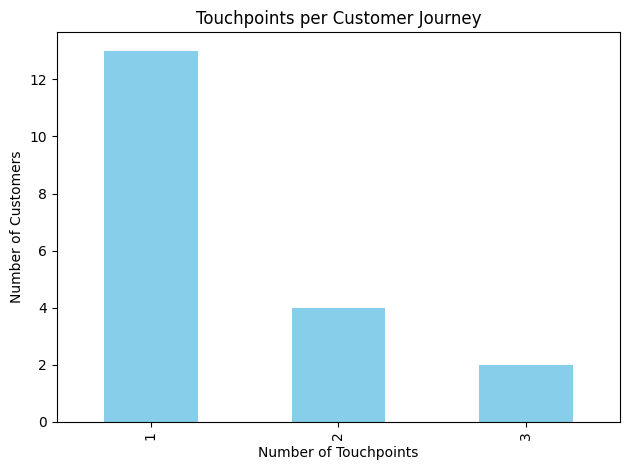

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import numpy as np

# Count touchpoints per customer
touchpoint_counts = cln_df_touchpoints.groupby("customer_id").size()
 
# Create distribution
distribution = touchpoint_counts.value_counts().sort_index()
 
# Print summary
print("Touchpoint count per journey:")
print(distribution)
 
# Summary stats
print("\nSummary:")
print(f"Total customers: {len(touchpoint_counts)}")
print(f"Single-touch journeys: {(touchpoint_counts == 1).sum()}")
print(f"Multi-touch journeys: {(touchpoint_counts > 1).sum()}")
print(f"Most common journey length: {touchpoint_counts.value_counts().idxmax()} touchpoint(s)")
 
# Plot
distribution.plot(kind="bar", color="skyblue", title="Touchpoints per Customer Journey")
plt.xlabel("Number of Touchpoints")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.show()

In [42]:
for col in tch_cat_cols:
    print(f"\n{col.upper()}:")
    print(f"  Unique values: {cln_df_touchpoints[col].nunique()}")
    print(f"  Unique list: {cln_df_touchpoints[col].unique().tolist()}")
    print(f"\n  Value counts:")
    print(cln_df_touchpoints[col].value_counts())


CHANNEL:
  Unique values: 7
  Unique list: ['Instagram', 'Direct', 'Email', 'TikTok', 'Walk-in', 'Facebook', 'Google']

  Value counts:
channel
Direct       7
Email        6
Walk-in      5
Google       4
Instagram    2
TikTok       2
Facebook     1
Name: count, dtype: int64

TOUCHPOINT_TYPE:
  Unique values: 5
  Unique list: ['Ad Click', 'Web Visit', 'Email Open', 'Store Visit', 'Ad View']

  Value counts:
touchpoint_type
Web Visit      14
Store Visit     5
Ad Click        4
Email Open      3
Ad View         1
Name: count, dtype: int64

DEVICE_TYPE:
  Unique values: 3
  Unique list: ['Mobile', 'Desktop', 'Store']

  Value counts:
device_type
Mobile     14
Desktop     8
Store       5
Name: count, dtype: int64

REFERRER_SOURCE:
  Unique values: 9
  Unique list: ['instagram.com', 'direct', 'email', 'gmail.com', 'tiktok.com', 'Walk In', 'facebook.com', 'google.com', 'outlook.com']

  Value counts:
referrer_source
direct           7
Walk In          5
google.com       4
email            3


In [43]:
# # Create boxplots for numeric columns
# fig, ax = plt.subplots()
 
# # Pages viewed boxplot
# ax.boxplot( cln_df_touchpoints.groupby("customer_id].dropna(), vert=True)
# ax.set_title('Pages Viewed Distribution', fontsize=12, fontweight='bold')
# ax.set_ylabel('Pages Viewed')
# ax.grid(True, alpha=0.3)
 
# # # Cart additions boxplot
# # axes[1].boxplot(cln_df_touchpoints['cart_additions'].dropna(), vert=True)
# # axes[1].set_title('Cart Additions Distribution', fontsize=12, fontweight='bold')
# # axes[1].set_ylabel('Cart Additions')
# # axes[1].grid(True, alpha=0.3)
 
# # # Cart value boxplot (non-zero)
# # cart_values_nonzero = cln_df_touchpoints['cart_value'][cln_df_touchpoints['cart_value'] > 0].dropna()
# # axes[2].boxplot(cart_values_nonzero, vert=True)
# # axes[2].set_title('Cart Value Distribution (Non-zero)', fontsize=12, fontweight='bold')
# # axes[2].set_ylabel('Cart Value ($)')
# # axes[2].grid(True, alpha=0.3)
 
# plt.tight_layout()
# plt.show()
 
# # Identify outliers
# Q1 = cln_df_touchpoints['cart_value'].quantile(0.25)
# Q3 = cln_df_touchpoints['cart_value'].quantile(0.75)
# IQR = Q3 - Q1
# outliers = cln_df_touchpoints[
#     (cln_df_touchpoints['cart_value'] < Q1 - 1.5 * IQR) |
#     (cln_df_touchpoints['cart_value'] > Q3 + 1.5 * IQR)
# ]
# print(f"\nFound {len(outliers)} outliers in cart_value (using IQR method)")

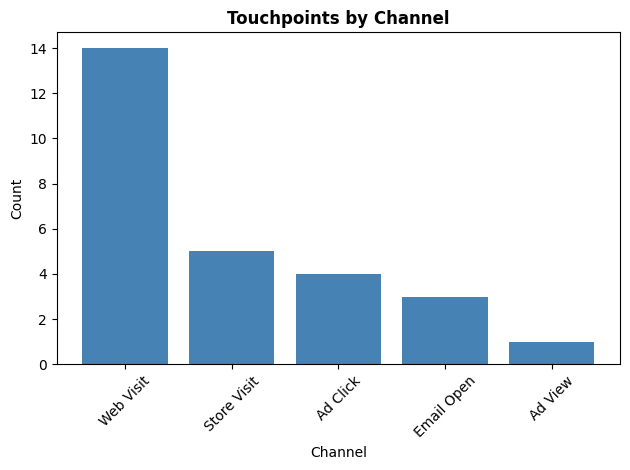

In [485]:
# Create bar charts for categorical variables

# Channel distribution

fig, ax = plt.subplots()

channel_counts = cln_df_touchpoints['touchpoint_type'].value_counts()
ax.bar(channel_counts.index, channel_counts.values, color='steelblue')
ax.set_title('Touchpoints by Channel', fontsize=12, fontweight='bold')
ax.set_xlabel('Channel')
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=45)


plt.tight_layout()
plt.show()

In [ ]:
#Test